In [557]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA

In [558]:

df = pd.read_csv("data\online_retail.csv") 

df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [559]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [560]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [561]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [562]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [563]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [564]:
df.groupby('Country').agg({'InvoiceNo': 'count', 'UnitPrice': 'sum'}).reset_index().sort_values(by='UnitPrice', ascending=False)

,Country,InvoiceNo,UnitPrice
36,United Kingdom,495478,2245715.474
10,EIRE,8196,48447.190
13,France,8557,43031.990
14,Germany,9495,37666.000
30,Singapore,229,25108.890
27,Portugal,1519,13037.540
31,Spain,2533,12633.450
16,Hong Kong,288,12241.500
3,Belgium,2069,7540.130
33,Switzerland,2002,6813.690


In [565]:
revenues = df[df['UnitPrice'] > 0]

revenues.groupby('Country').agg({'InvoiceNo': 'count', 'UnitPrice': 'sum'}).reset_index().sort_values(by='UnitPrice', ascending=False)


,Country,InvoiceNo,UnitPrice
36,United Kingdom,492979,2267839.594
10,EIRE,8192,48447.190
13,France,8556,43031.990
14,Germany,9493,37666.000
30,Singapore,229,25108.890
27,Portugal,1519,13037.540
31,Spain,2532,12633.450
16,Hong Kong,288,12241.500
3,Belgium,2069,7540.130
33,Switzerland,2001,6813.690


In [566]:
devolutions = df[df['UnitPrice'] < 0]

devolutions.groupby('Country').agg({'InvoiceNo': 'count', 'UnitPrice': 'sum'}).reset_index().sort_values(by='UnitPrice', ascending=False)


,Country,InvoiceNo,UnitPrice
0,United Kingdom,2,-22124.12


In [567]:
cust_null_id = df[df['CustomerID'].isnull()]

cust_null_id.groupby('Country').agg({'InvoiceNo': 'count', 'UnitPrice': 'sum'}).reset_index().sort_values(by='UnitPrice', ascending=False)

,Country,InvoiceNo,UnitPrice
7,United Kingdom,133600,1067438.21
3,Hong Kong,288,12241.50
1,EIRE,711,10193.61
8,Unspecified,202,423.01
6,Switzerland,125,245.09
4,Israel,47,166.54
2,France,66,160.75
5,Portugal,39,107.68
0,Bahrain,2,7.62


In [568]:
# Filter out customer ID with null records, negative unit price records, and negative quantity records
df = df[(df['CustomerID'].notnull()) & (df['UnitPrice'] > 0) & (df['Quantity'] > 0)]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [569]:
# CustomerID to Integer
df['CustomerID'] = df['CustomerID'].astype(int)

**Customer Lifetime Value (LTV)**: Σ(Quantity × UnitPrice) per customer

In [570]:
ltv = df.groupby('CustomerID').apply(lambda x: (x['Quantity'] * x['UnitPrice']).sum()).reset_index()
ltv.columns = ['CustomerID', 'LTV']
ltv.head()

,CustomerID,LTV
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


### Data preparation to determine *Customer Segments*

**Recency**: days since last purchase
**Frequency**: number of invoces per customer
**Monetary**: total revenue per customer

In [571]:
df['InvoiceDate'] = df['InvoiceDate'].astype('datetime64[ns]')

type(df['InvoiceDate'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [572]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [573]:
## RFM Data
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (df['InvoiceDate'].max() - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',   # Frequency
    'UnitPrice': 'sum'     # Monetary
}).reset_index()



rfm.shape


(4338, 4)

In [574]:
# Rename columns
# Ensure correct column names and order
rfm = rfm.rename(columns={
    'CustomerID': 'CustomerID',
    'UnitPrice': 'Monetary',
    'InvoiceNo': 'Frequency',
    'InvoiceDate': 'Recency'
})[['CustomerID', 'Monetary', 'Frequency', 'Recency']]

rfm['Frequency'] = rfm['Frequency'].astype(int)
rfm['Monetary'] = rfm['Monetary'].astype(float)

rfm.head()


,CustomerID,Monetary,Frequency,Recency
0,12346,1.04,1,325
1,12347,481.21,7,1
2,12348,178.71,4,74
3,12349,605.10,1,18
4,12350,65.30,1,309


<Figure size 1200x400 with 0 Axes>

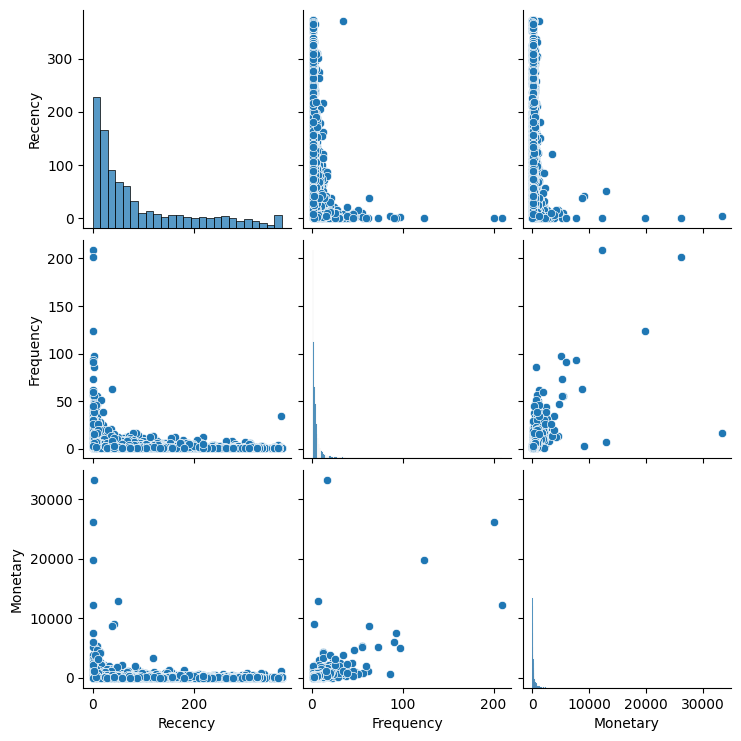

In [575]:
plt.figure(figsize=(12,4))
sns.pairplot(rfm[['Recency','Frequency','Monetary']])
plt.show()

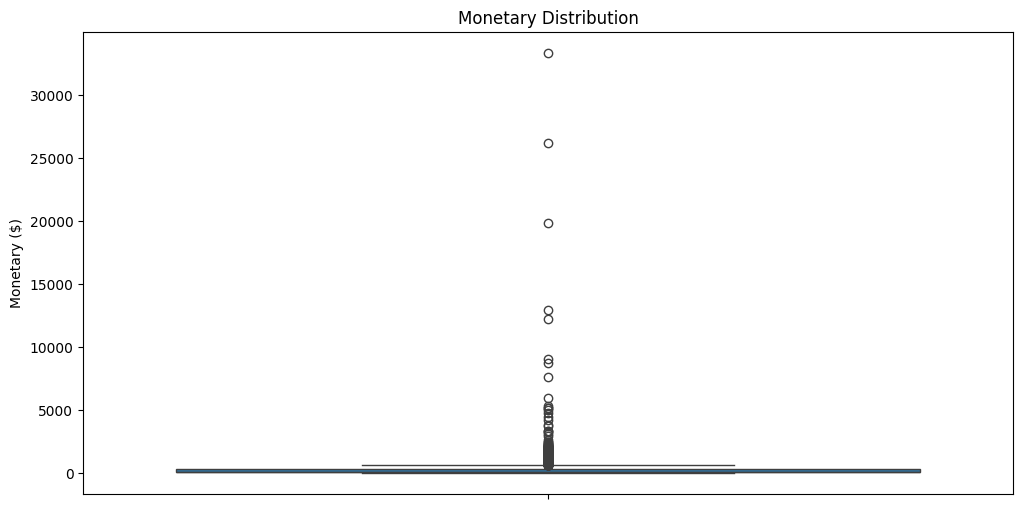

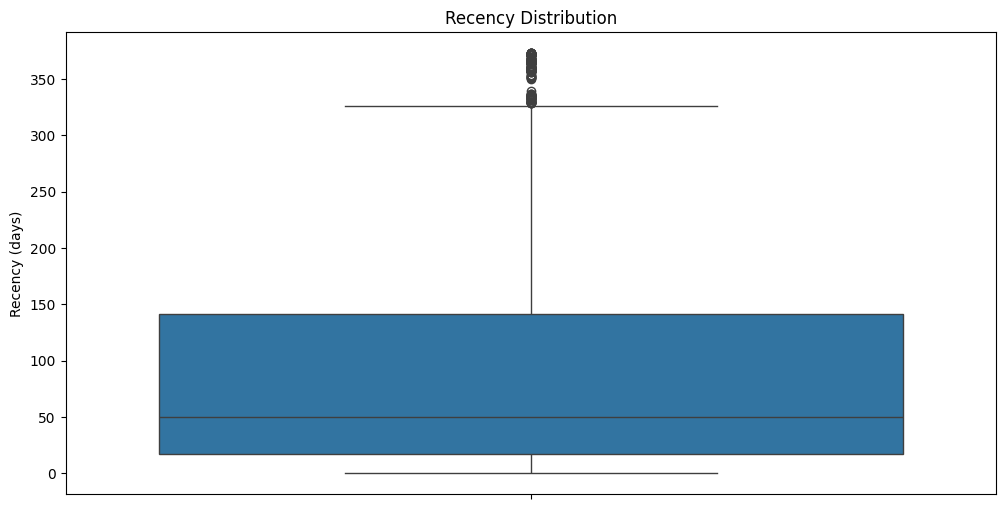

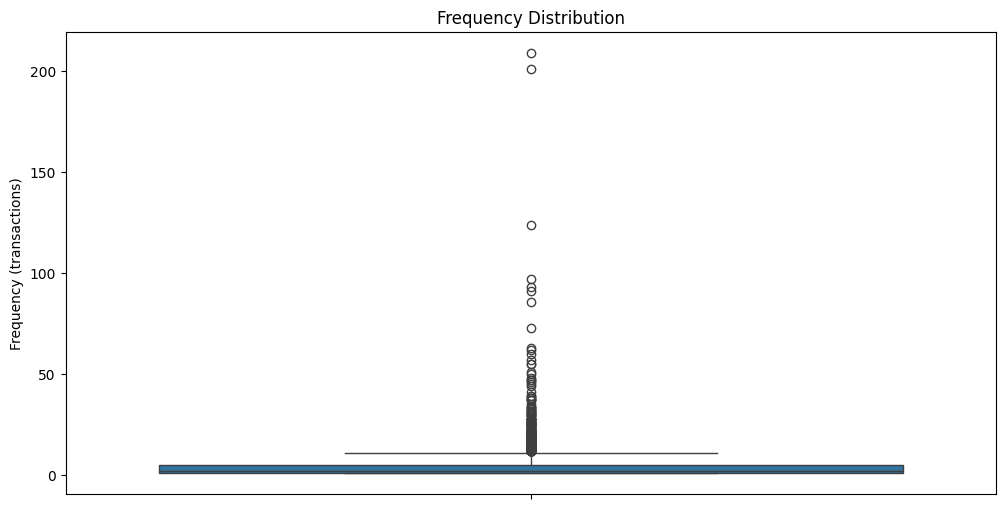

In [576]:
# Plot monetary, recency and frequency distribution 
plt.figure(figsize=(12,6))
sns.boxplot(y='Monetary', data=rfm)
plt.title("Monetary Distribution")
plt.ylabel("Monetary ($)")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(y='Recency', data=rfm)
plt.title("Recency Distribution")
plt.ylabel("Recency (days)")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(y='Frequency', data=rfm)
plt.title("Frequency Distribution")
plt.ylabel("Frequency (transactions)")
plt.show()

In [ ]:
# Outliers

monetary_outliers = rfm[(rfm['Monetary'] > 5000) ]
frequency_outliers = rfm[(rfm['Frequency'] > 30) ]

len(monetary_outliers), len(frequency_outliers)

(12, 42)

In [578]:
# Filter out outliers
rfm_filtered = rfm[~rfm.index.isin(monetary_outliers.index)]
rfm_filtered = rfm_filtered[~rfm_filtered.index.isin(frequency_outliers.index)]
rfm_filtered = rfm_filtered.copy()
len(rfm_filtered)

4293

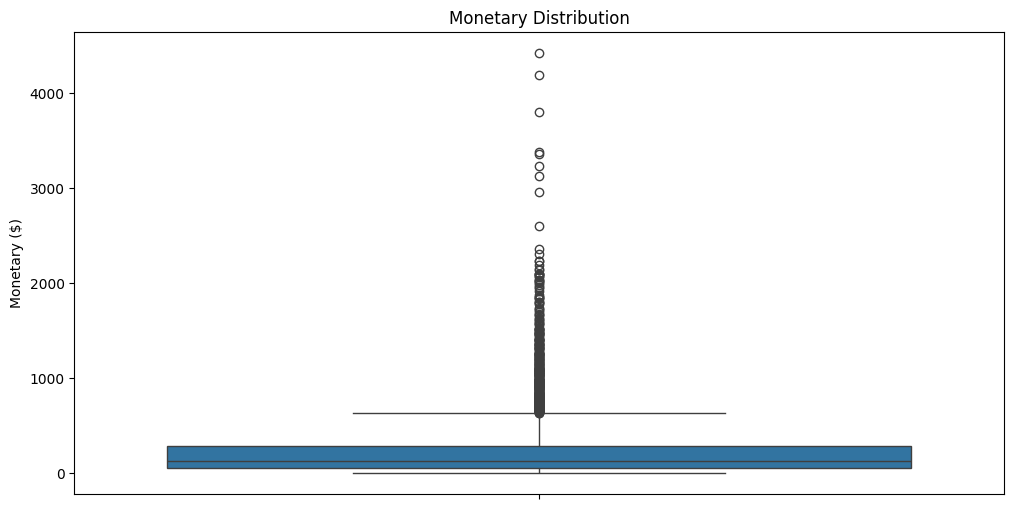

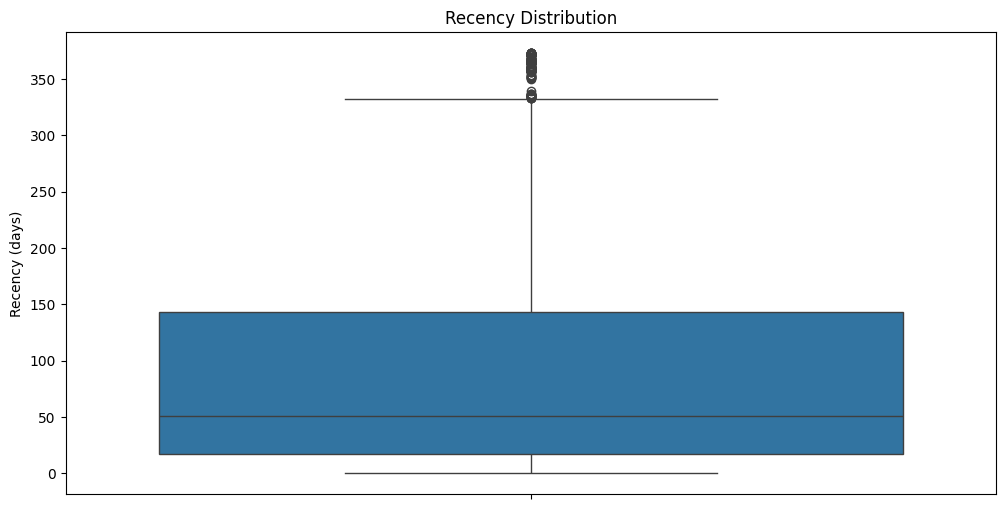

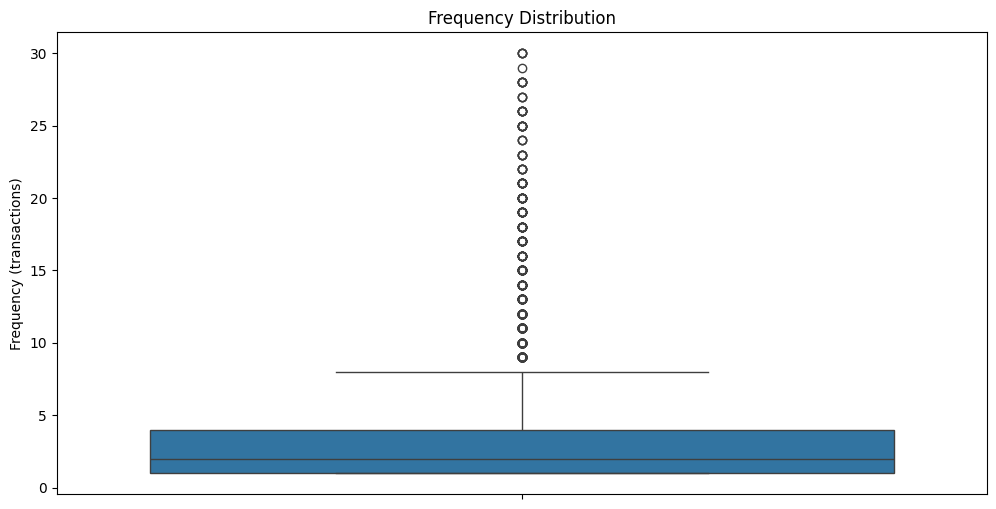

In [579]:
# Plot monetary, recency and frequency distribution 
plt.figure(figsize=(12,6))
sns.boxplot(y='Monetary', data=rfm_filtered)
plt.title("Monetary Distribution")
plt.ylabel("Monetary ($)")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(y='Recency', data=rfm_filtered)
plt.title("Recency Distribution")
plt.ylabel("Recency (days)")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(y='Frequency', data=rfm_filtered)
plt.title("Frequency Distribution")
plt.ylabel("Frequency (transactions)")
plt.show()

### Scale features 
Since the attributes are in different measures Recency (days), Monetary (currency), Frequency (count)

In [580]:
# Log transformation +  standardization

rfm_filtered['Recency_log'] = np.log1p(rfm_filtered['Recency'])
rfm_filtered['Frequency_log'] = np.log1p(rfm_filtered['Frequency'])
rfm_filtered['Monetary_log'] = np.log1p(rfm_filtered['Monetary'])

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_filtered[['Recency_log', 'Frequency_log', 'Monetary_log']])

rfm_scaled

array([[ 1.41226254, -0.98746798, -3.09008772],
       [-2.19557063,  1.19710722,  1.08354199],
       [ 0.37150018,  0.45645769,  0.32980079],
       ...,
       [-1.21367741, -0.34852069, -0.46594304],
       [-1.70462402,  2.38492941,  1.79358142],
       [-0.02251095,  0.10481962, -0.07657848]])

### **KMeans** to cluster customers

In [581]:
sse = []
silhouette_scores = []

for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(rfm_scaled, kmeans.labels_))


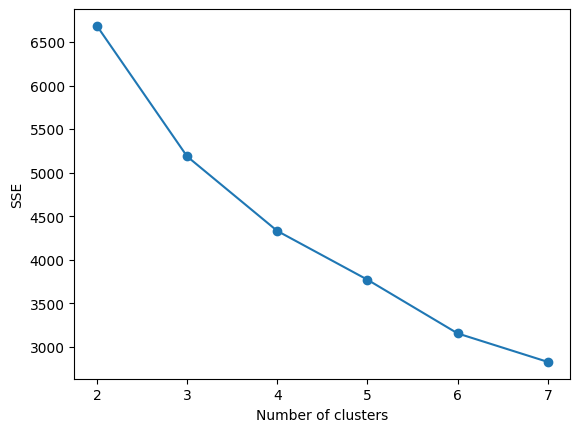

In [582]:
# Plot elbow curve
plt.plot(range(2, 8), sse, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

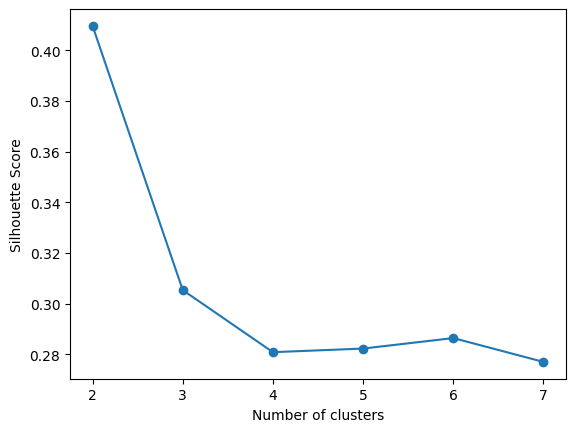

In [583]:
# Plot silhouette scores
plt.plot(range(2, 8), silhouette_scores, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()

### Assign cluster labels

In [584]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm_filtered['Cluster'] = kmeans.fit_predict(rfm_scaled)

rfm_filtered.head()


,CustomerID,Monetary,Frequency,Recency,Recency_log,Frequency_log,Monetary_log,Cluster
0,12346,1.04,1,325,5.786897,0.693147,0.712950,1
1,12347,481.21,7,1,0.693147,2.079442,6.178380,0
2,12348,178.71,4,74,4.317488,1.609438,5.191344,2
3,12349,605.10,1,18,2.944439,0.693147,6.407045,2
4,12350,65.30,1,309,5.736572,0.693147,4.194190,1


### Profile clusters

In [585]:
cluster_profile = rfm_filtered.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':'mean',
    'CustomerID':'count'
}).rename(columns={'CustomerID':'NumCustomers'}).reset_index()


cluster_profile.head()


,Cluster,Recency,Frequency,Monetary,NumCustomers
0,0,14.699346,9.564270,645.496373,918
1,1,170.588774,1.278829,53.242002,1639
2,2,59.539747,3.010945,207.105785,1736





## **Cluster Interpretation**

| Cluster | Recency (days) | Frequency | Monetary | NumCustomers | Segment Meaning                                                                         |
| ------- | -------------- | --------- | -------- | ------------ | --------------------------------------------------------------------------------------- |
| 0       | 14.7           | 9.56      | 645.5    | 918          | **High-value loyal customers** – buy frequently, spend a lot, very recent.              |
| 1       | 170.6          | 1.28      | 53.2     | 1639         | **Low-value dormant customers** – rare purchases, low spending, last purchase long ago. |
| 2       | 59.5           | 3.01      | 207.1    | 1736         | **Medium-value customers** – moderate spend, moderate frequency, somewhat recent.       |

✅ Observations:

* **Cluster 0** VIP segment — small but very profitable.
* **Cluster 1** inactive segment — large group, low contribution.
* **Cluster 2** is the “middle class” — potentially upsell opportunities.

---



### Visualize

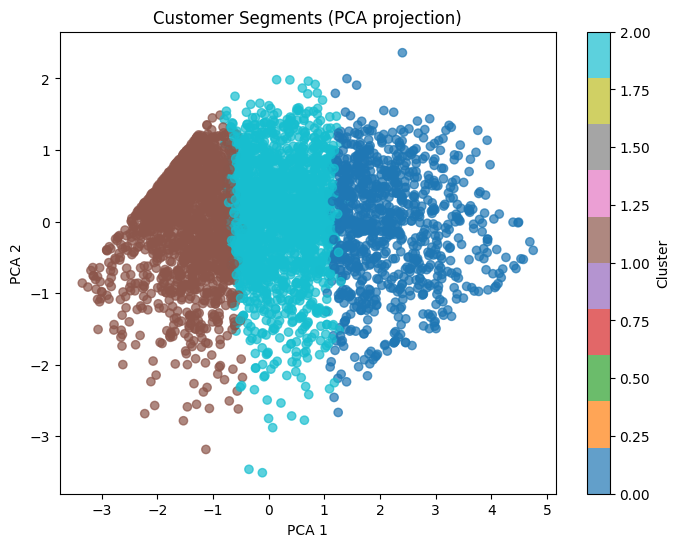

In [586]:
# Reduce RFM to 2D for visualization
pca = PCA(n_components=2)
rfm_2d = pca.fit_transform(rfm_scaled)

plt.figure(figsize=(8,6))
plt.scatter(rfm_2d[:,0], rfm_2d[:,1], c=rfm_filtered['Cluster'], cmap='tab10', alpha=0.7)
plt.title("Customer Segments (PCA projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")
plt.show()


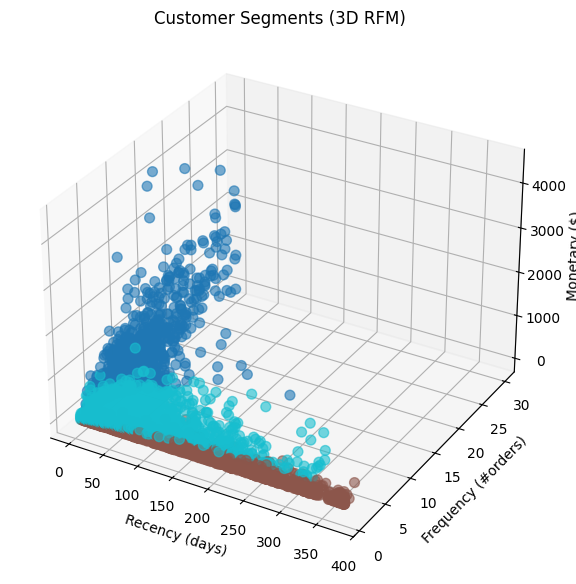

In [587]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(rfm_filtered['Recency'], rfm_filtered['Frequency'], rfm_filtered['Monetary'], 
           c=rfm_filtered['Cluster'], cmap='tab10', s=50, alpha=0.6)

ax.set_xlabel("Recency (days)")
ax.set_ylabel("Frequency (#orders)")
ax.set_zlabel("Monetary ($)")
plt.title("Customer Segments (3D RFM)")
plt.show()


### **KPIs**

**Total Revenue per Segment**: sum of LTVs by segment

In [588]:
rfm = rfm_filtered.copy()

rfm.drop(columns=['Recency_log', 'Frequency_log', 'Monetary_log'], inplace=True)

In [589]:
rfm.head()

,CustomerID,Monetary,Frequency,Recency,Cluster
0,12346,1.04,1,325,1
1,12347,481.21,7,1,0
2,12348,178.71,4,74,2
3,12349,605.10,1,18,2
4,12350,65.30,1,309,1


In [590]:
# Define the mapping
cluster_names = {
    0: 'VIP',
    1: 'Inactive',
    2: 'Middle Class'
}

# Apply mapping
rfm['Segment'] = rfm['Cluster'].map(cluster_names)

# Optional: reorder columns for clarity
rfm = rfm[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'Segment']]
rfm.head()


,CustomerID,Recency,Frequency,Monetary,Segment
0,12346,325,1,1.04,Inactive
1,12347,1,7,481.21,VIP
2,12348,74,4,178.71,Middle Class
3,12349,18,1,605.10,Middle Class
4,12350,309,1,65.30,Inactive


### **KPIs**

**Total Revenue per Segment**: sum of LTVs by segment

In [614]:
total_revenue = rfm.groupby('Segment')['Monetary'].sum().reset_index().rename(columns={'Monetary':'TotalRevenue'})
total_revenue

,Segment,TotalRevenue
0,Inactive,87263.641
1,Middle Class,359535.643
2,VIP,592565.670


**Average Order Value (AOV)**: Total revenue / Number of orders per segment

In [606]:
# Average order value per customer

rfm['aov'] = rfm['Monetary'] / rfm['Frequency']

# Average order value per segment
rfm.groupby('Segment').agg({
    'aov':'mean',
}).reset_index()


,Segment,aov
0,Inactive,47.262104
1,Middle Class,82.662968
2,VIP,75.166602


**Purchase Frequency**: Number of orders / Time period per segment

In [ ]:
purchase_frequency = rfm.groupby('Segment')['Frequency'].mean().reset_index().rename(columns={'Frequency':'AvgPurchaseFrequency'})
purchase_frequency

,Segment,AvgPurchaseFrequency
0,Inactive,1.278829
1,Middle Class,3.010945
2,VIP,9.564270


**Segment Size**: number of customers in each segment

In [609]:
segment_size = rfm.groupby('Segment')['CustomerID'].count().reset_index().rename(columns={'CustomerID':'SegmentSize'})
segment_size

# Share of each segment in total customers
segment_size['Share'] = segment_size['SegmentSize'] / segment_size['SegmentSize'].sum()
segment_size

,Segment,SegmentSize,Share
0,Inactive,1639,0.381784
1,Middle Class,1736,0.404379
2,VIP,918,0.213836


**Revenue Contribution %**: share of each segment in total revenue

In [608]:
# Percentage of revenue contribution per customer
rfm['RevenueContribution'] = rfm['Monetary'] / rfm['Monetary'].sum()

# Percentage of revenue contribution per segment
segment_revenue_contribution = rfm.groupby('Segment')['RevenueContribution'].sum().reset_index()    
segment_revenue_contribution

,Segment,RevenueContribution
0,Inactive,0.083959
1,Middle Class,0.345919
2,VIP,0.570123


### Visualizations

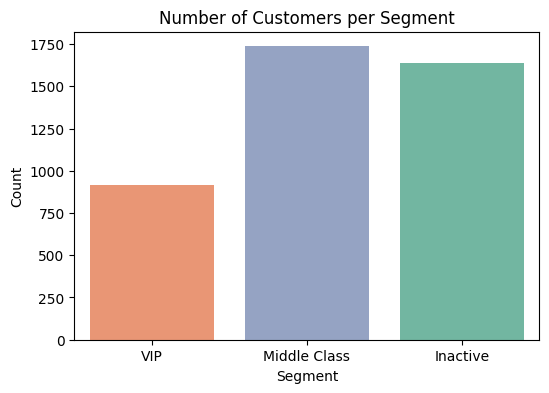

In [618]:
plt.figure(figsize=(6,4))
sns.countplot(x='Segment', hue='Segment', data=rfm, order=['VIP','Middle Class','Inactive'], palette='Set2')
plt.title("Number of Customers per Segment")
plt.ylabel("Count")
plt.show()


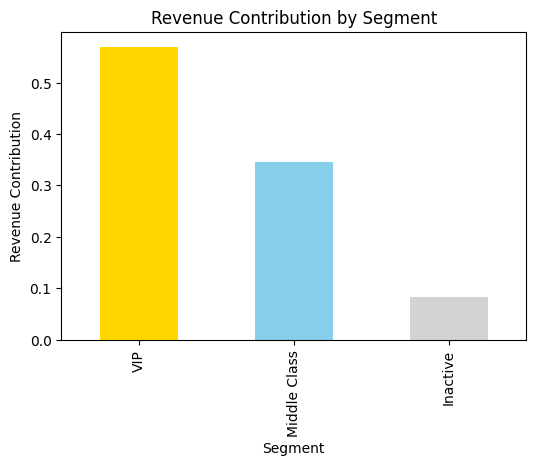

In [619]:
segment_revenue = rfm.groupby('Segment')['RevenueContribution'].sum().reindex(['VIP','Middle Class','Inactive'])

plt.figure(figsize=(6,4))
segment_revenue.plot(kind='bar', color=['gold','skyblue','lightgray'])
plt.ylabel("Revenue Contribution")
plt.title("Revenue Contribution by Segment")
plt.show()


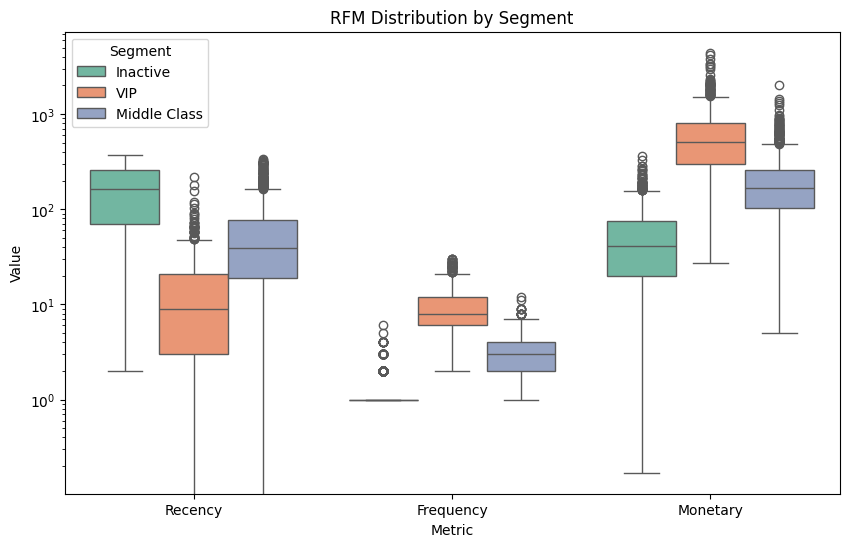

In [620]:
rfm_melted = rfm.melt(id_vars='Segment', value_vars=['Recency','Frequency','Monetary'], var_name='Metric', value_name='Value')

plt.figure(figsize=(10,6))
sns.boxplot(x='Metric', y='Value', hue='Segment', data=rfm_melted, palette='Set2')
plt.title("RFM Distribution by Segment")
plt.yscale('log')  # Use log scale for skewed data
plt.show()


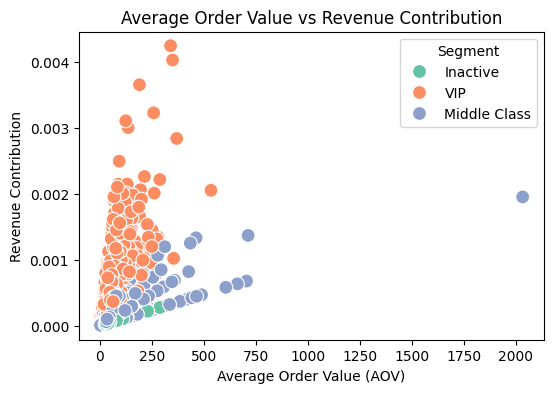

In [621]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='aov', y='RevenueContribution', hue='Segment', data=rfm, palette='Set2', s=100)
plt.title("Average Order Value vs Revenue Contribution")
plt.xlabel("Average Order Value (AOV)")
plt.ylabel("Revenue Contribution")
plt.show()



## **Customer Segmentation Report**

Customers were segmented into **three categories** based on their purchase behavior: **VIP**, **Middle Class**, and **Inactive**.

### **Segment Overview**

| Segment      | % of Customers | % of Total Revenue | Notes                                                                                                                                        |
| ------------ | -------------- | ------------------ | -------------------------------------------------------------------------------------------------------------------------------------------- |
| VIP          | 21%            | 57%                | High frequency and high monetary value; the most profitable segment.                                                                         |
| Middle Class | 40%            | 35%                | Moderate spend; interestingly, this segment has the **highest Average Order Value** despite roughly **half the purchase frequency** of VIPs. |
| Inactive     | 39%            | 8%                 | Rarely purchase and contribute little to revenue.                                                                                            |

> Together, **VIP and Middle Class customers (61% of total customers) generate 92% of total revenue**, highlighting the importance of targeting these groups for retention and upsell strategies.

### **Key Insights**

1. **VIP Segment**

   * Frequent buyers with the highest total spend.
   * Target with **loyalty programs, premium offers, and personalized campaigns**.

2. **Middle Class Segment**

   * High Average Order Value but lower purchase frequency than VIP.
   * Opportunity for **cross-selling and upselling** to increase their lifetime value.

3. **Inactive Segment**

   * Low frequency and low spend.
   * Potential focus on **win-back campaigns** or cost-efficient marketing strategies.



